<a href="https://colab.research.google.com/github/shakurovas/pt-ms_gb/blob/master/homework5_pt%26ms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import scipy.stats as st
import math
import numpy as np

**Задания:**

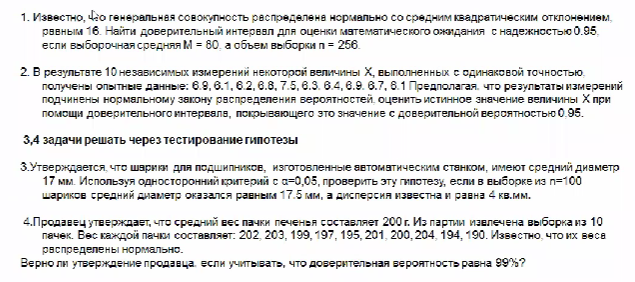

**Задание 1**

**Решение:**

In [3]:
X_avg_sample_1 = 80
sigma_1 = 16
accuracy_1 = 0.95
n_1 = 256

In [4]:
z_score_1 = st.norm.isf((1 - accuracy_1) / 2)
print(z_score_1)

1.959963984540054


In [5]:
conf_int_left_1 = X_avg_sample_1 - z_score_1 * sigma_1 / math.sqrt(n_1)
print(conf_int_left_1)

78.04003601545995


In [6]:
conf_int_right_1 = X_avg_sample_1 + z_score_1 * sigma_1 / math.sqrt(n_1)
print(conf_int_right_1)

81.95996398454005


Доверительный интервал: [78.040, 81.960]

**Задание 2**

**Решение:**

In [7]:
exp_data_2 = np.array([6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1])

In [8]:
X_avg_sample_2 = exp_data_2.mean()
print(X_avg_sample_2) 

6.590000000000001


In [9]:
sigma_2 = exp_data_2.std(ddof=1)
print(sigma_2)

0.4508017549014448


In [10]:
accuracy_2 = 0.95
n_2 = exp_data_2.shape[0]
print(n_2)

10


In [11]:
t_score_2 = abs(st.t.ppf((1 - accuracy_2) / 2, n_2 - 1)) # то, что критерий Стьюдента получается отрицательным, говорит о том, что среднее выборочное меньше мат. ожидания изначальной выборки
print(t_score_2)

2.2621571627409915


In [45]:
conf_int_left_2 = X_avg_sample_2 - t_score_2 * sigma_2 / math.sqrt(n_2)
print(conf_int_left_2)

6.267515851415713


In [33]:
conf_int_right_2 = X_avg_sample_2 + t_score_2 * sigma_2 / math.sqrt(n_2)
print(conf_int_right_2)

6.912484148584288


In [44]:
# st.t.interval(0.95, 9, loc=X_avg_sample_2, scale=st.sem(exp_data_2))

(6.267515851415713, 6.912484148584288)

Итак, с надежностью 0,95 истинное значение измеряемой величины заключено в доверительном интервале 6.268 <= X <= 6.912

**Задание 3**

**Решение:**

Н0 (нулевая гипотеза): средний диаметр шариков для подшипников = 17 мм
  
  Н1 (альтернативная гипотеза): средний диаметр шариков для подшипников > 17 мм

In [16]:
alfa_3 = 0.05
accuracy_3 = 1 - alfa_3
n_3 = 100
X_avg_3 = 17
X_avg_sample_3 = 17.5
variance_3 = 4

Будем использовать **z-критерий**, так как дисперсия генеральной выборки нам известна:

In [17]:
z_3 = (X_avg_sample_3 - X_avg_3) / (math.sqrt(variance_3/n_3))
print(z_3) 

2.5


In [18]:
p_value_3_1 = 1 - st.norm.cdf(2.5)
print(p_value_3_1)

0.006209665325776159


или:

In [19]:
p_value_3_2 = st.norm.sf(abs(2.5))
print(p_value_3_2)

0.006209665325776132


**p_value** получилось равным примерно 0.006, это < 0.05 (альфа), значит, отвергаем Н0 => верна Н1 (средний диаметр шариков для подшипников действительно > 17 мм)

**Задание 4**

**Решение:**

Н0 (нулевая гипотеза): средний вес пачки печенья = 200 г

Н1 (альтернативная гипотеза): средний вес пачки печенья != 200 г (то есть будет двухсторонний тест - в большую и меньшую стороны)

In [20]:
exp_data_4 = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
accuracy_4 = 0.99
X_avg_4 = 200

In [21]:
n_4 = exp_data_4.shape[0]
print(n_4)

10


In [22]:
X_avg_sample_4 = exp_data_4.mean()
print(X_avg_sample_4)

198.5


In [23]:
variance_4 = exp_data_4.var(ddof=1)
print(variance_4)

19.833333333333332


In [24]:
sigma = exp_data_4.std(ddof=1)
print(sigma)

4.453463071962462


Дисперсия генеральной выборки нам *неизвестна*, поэтому будем использовать **критерий Стьюдента**:

Рассчитаем наш критерий Стьюдента:

In [25]:
t_4_1 = (X_avg_sample_4 - X_avg_4) / (math.sqrt(variance_4/n_4))
print(t_4_1) 

-1.0651074037450896


Значение критерия Стьюдента из таблицы:

In [46]:
t_4_2 = abs(st.t.ppf((1 - accuracy_4) / 2, n_4 - 1))
print(t_4_2)

2.8214379233005493


То есть -3.250 и +3.250. Наше посчитанное значение по выборке получилось -1.065, оно входит в этот промежуток ([-3.250, +3.250]), поэтому мы отвергаем альтернативную гипоетзу Н1 и принимаем нулевую Н0: средний вес пачки печенья действительно примерно равен 200 г

либо другой вариант (именно через p-value):

In [27]:
st.t.sf(abs(t_4_1), 9) * 2 # умножаем на 2, т. к. тест двухсторонний

0.31456660352472854

или:

In [28]:
result = st.ttest_1samp(exp_data_4, 200).pvalue
print(result)

0.31456660352472854


Получившееся значение больше, чем 0.005 ((1 - accuracy_4) / 2), поэтому мы принимаем Н0 и считаем, что действительно вес пачки печенья примерно равен 200 г
